正方形


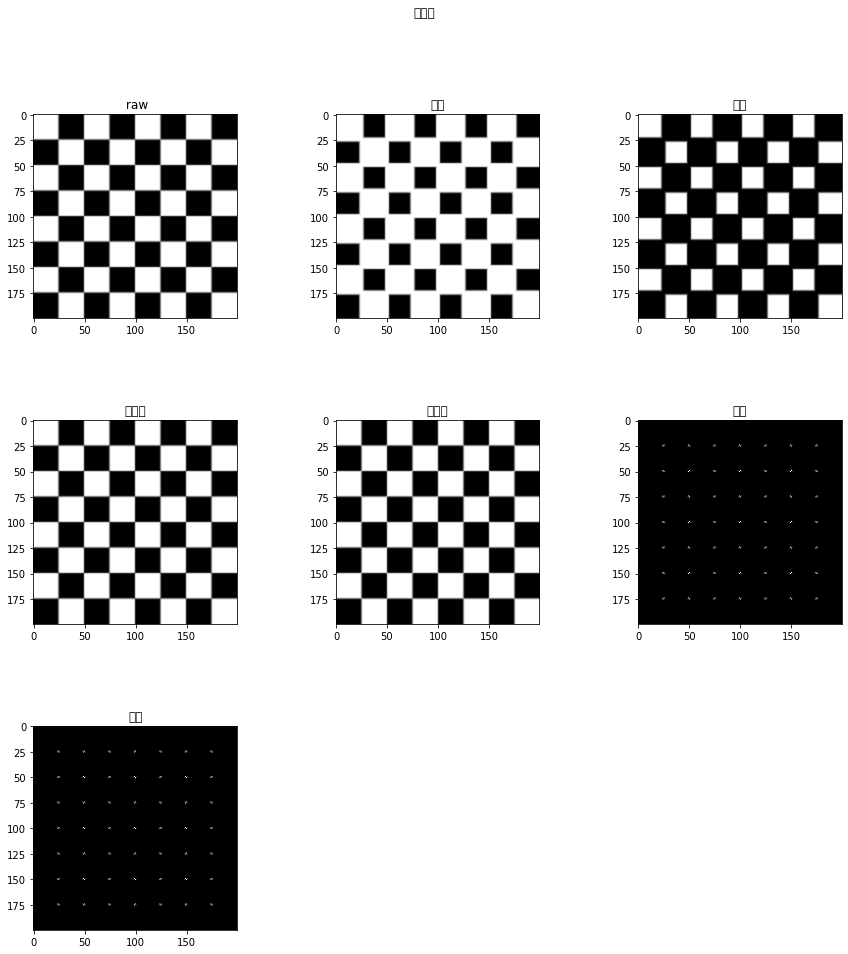

平面圆形


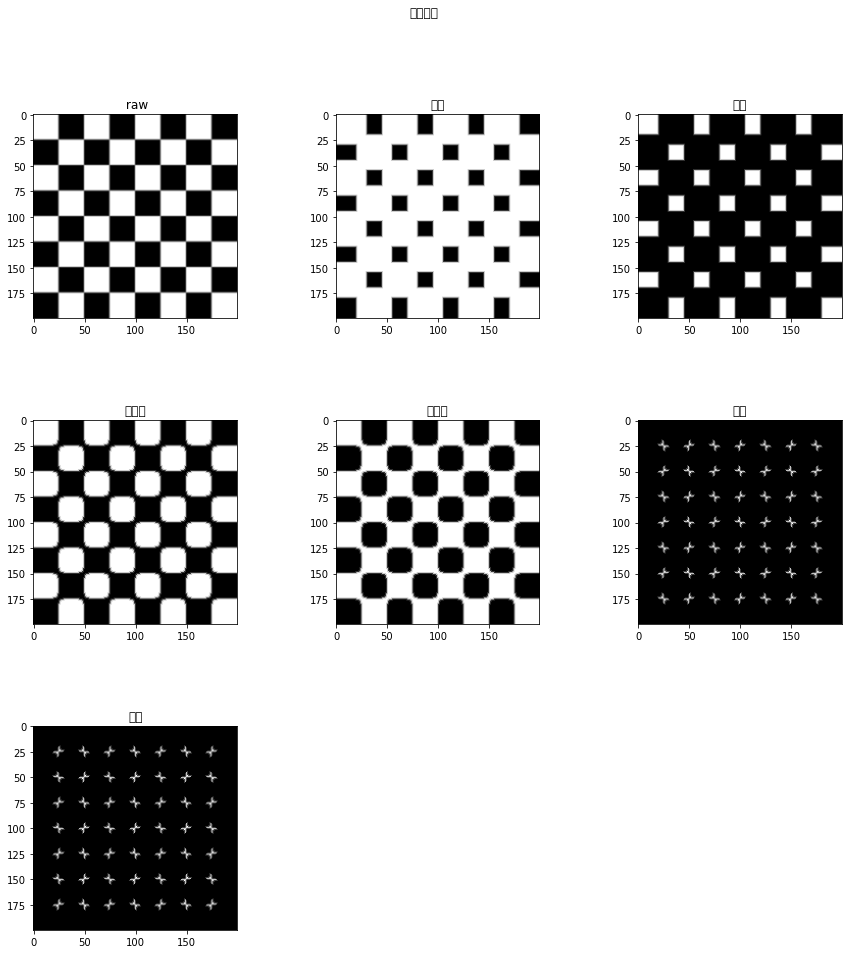

钻石形


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38075 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0, flags=flags)


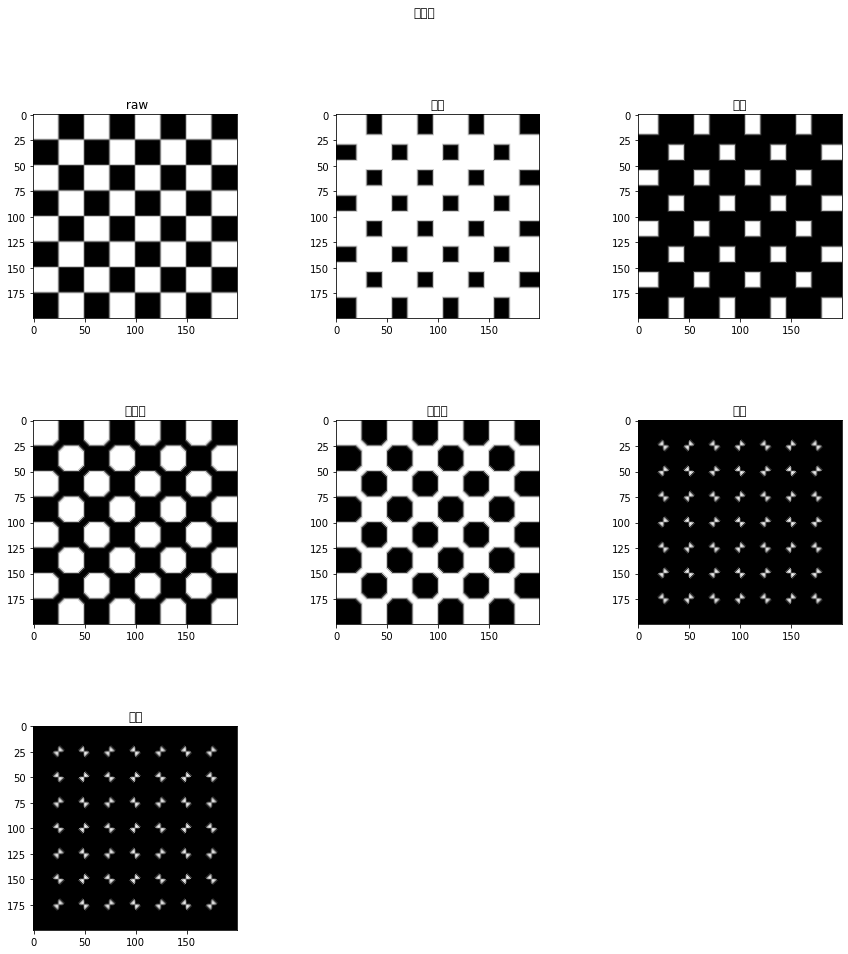

矩形


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30697 missing from current font.
  font.set_text(s, 0, flags=flags)


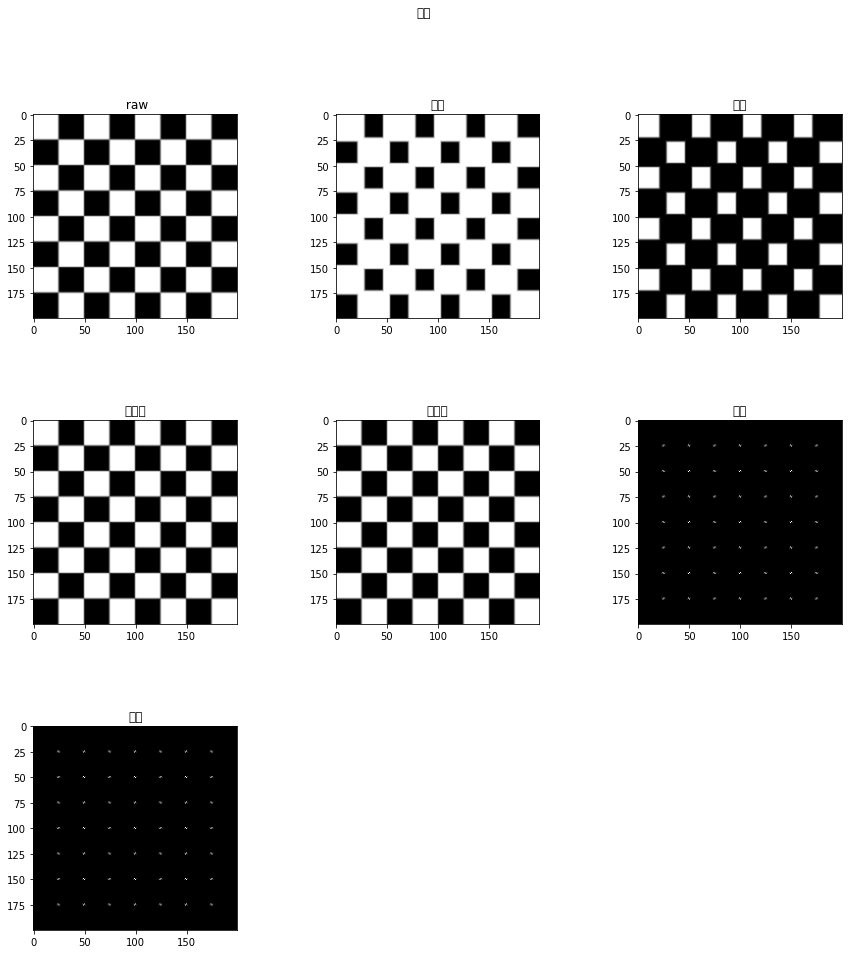

星形


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0, flags=flags)


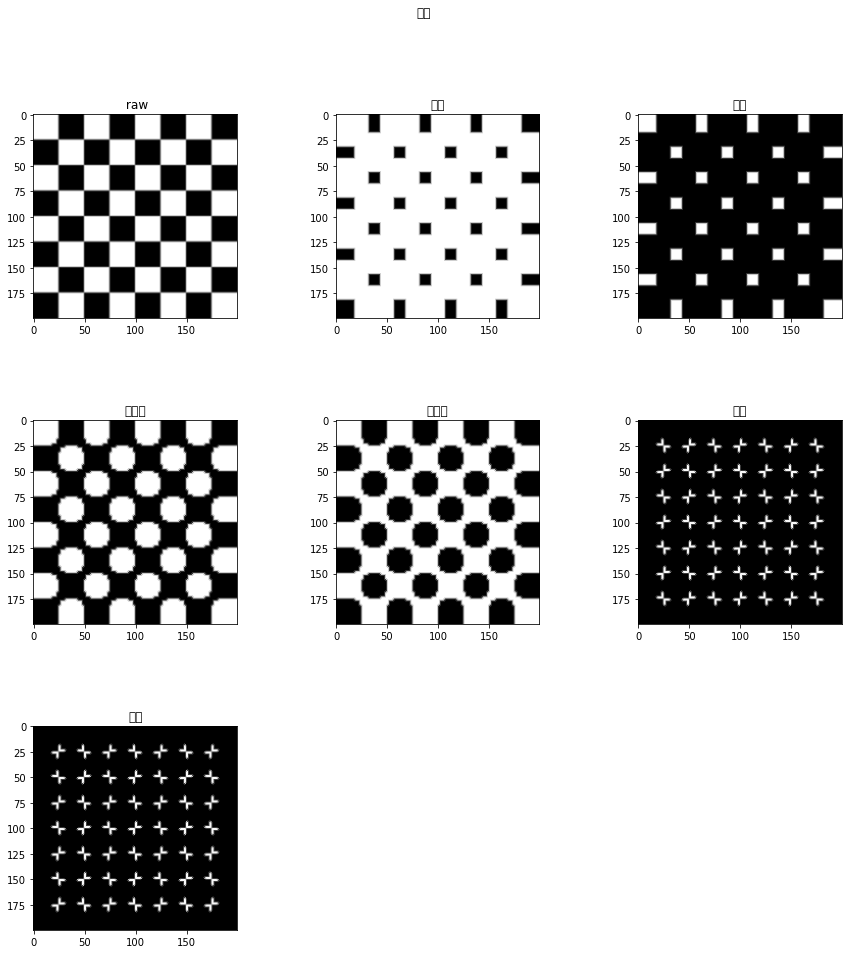

八角形


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20843 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35282 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20843 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35282 missing from current font.
  font.set_text(s, 0, flags=flags)


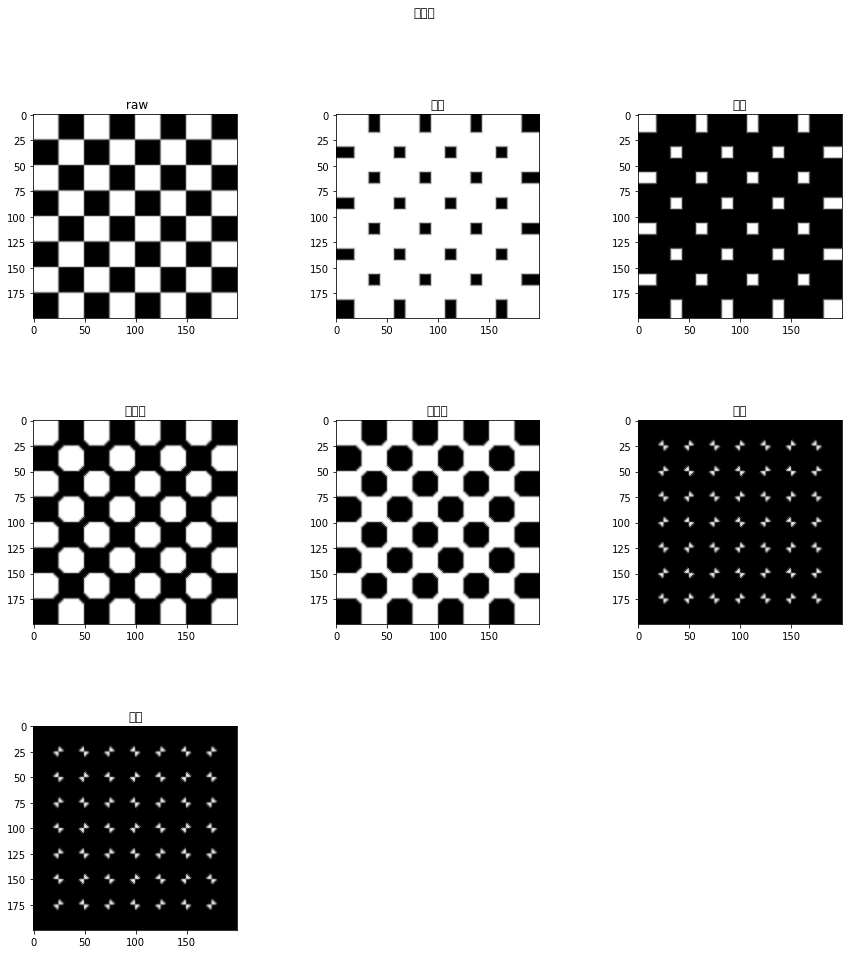

In [23]:
import numpy as np
from skimage import data
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=data.checkerboard()

size=5
hsize=8
methords={
    '膨胀':sm.dilation,
    '腐蚀':sm.erosion,
    '开运算':sm.opening,
    '闭运算':sm.closing,
    '白帽':sm.white_tophat,
    '黑帽':sm.black_tophat
}#对于0，1二值图像使用morphology.binary_dilation等
squares2d={
    '正方形':sm.square(size),
    '平面圆形':sm .disk(size),
    '钻石形' :sm.diamond(size),
    '矩形':sm.rectangle(size,hsize),
    '星形':sm.star(size),
    '八角形':sm.octagon(size,5)
}
squares3d={
    '球形':sm.ball(size),
    '立方体形':sm.cube(size),
    '八面体':sm.octahedron(size)
}

N=len(methords)+1
for square in squares2d:
    print(square)
    fig = plt.figure(figsize=(15,15))
    
    ax = fig.add_subplot(3,3,1)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title(' raw')
    n=2
    for methord in methords:
        #print(methord)
        img_=methords[methord](img,squares2d[square])
        
        ax = fig.add_subplot(3,3,n)
        plt.imshow(img_, cmap=plt.cm.gray)
        plt.title(methord)
        n=n+1
    plt.suptitle(square)
    plt.subplots_adjust(wspace=0.3,hspace=0.5)
    plt.show()

### 对图像进行形态学变换。变换对象一般为灰度图或二值图，功能函数放在morphology子模块内。
## 1、膨胀（dilation)
原理：一般对二值图像进行操作。找到像素值为1的点，将它的邻近像素点都设置成这个值。1值表示白，0值表示黑，因此膨胀操作可以扩大白色值范围，压缩黑色值范围。一般用来扩充边缘或填充小的孔洞。

#### 除了正方形的滤波器外，滤波器的形状还有一些，现列举如下：
    morphology.square: 正方形        morphology.disk:  平面圆形
    morphology.ball: 球形           morphology.cube: 立方体形
    morphology.diamond: 钻石形       morphology.rectangle: 矩形
    morphology.star: 星形           morphology.octagon: 八角形
    morphology.octahedron： 八面体
#### 注意，如果处理图像为二值图像（只有0和1两个值），则可以调用：
skimage.morphology.binary_dilation(image, selem=None）
用此函数比处理灰度图像要快。

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 205  50   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  50 205 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 205  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  50 205 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 205  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  50 205 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 205  50   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0] ++


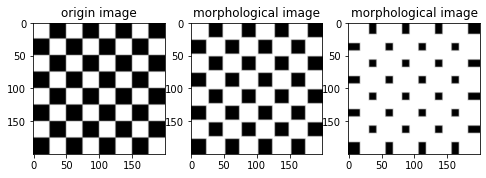

In [9]:
from skimage import data
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=data.checkerboard()
dst1=sm.dilation(img,sm.square(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.dilation(img,sm.square(15))  #用边长为15的正方形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

## 2、腐蚀（erosion)
函数：skimage.morphology.erosion(image, selem=None）
selem表示结构元素，用于设定局部区域的形状和大小。
和膨胀相反的操作，将0值扩充到邻近像素。扩大黑色部分，减小白色部分。可用来提取骨干信息，去掉毛刺，去掉孤立的像素。
#### 注意，如果处理图像为二值图像（只有0和1两个值），则可以调用：
skimage.morphology.binary_erosion(image, selem=None）

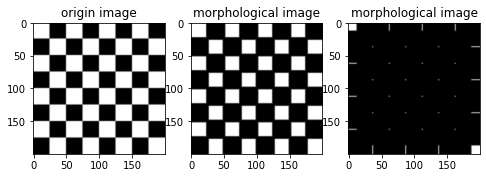

In [2]:
from skimage import data
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=data.checkerboard()
dst1=sm.erosion(img,sm.square(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.erosion(img,sm.square(25))  #用边长为25的正方形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

## 3、开运算（opening)
函数：skimage.morphology.openning(image, selem=None）
selem表示结构元素，用于设定局部区域的形状和大小。
先腐蚀再膨胀，可以消除小物体或小斑块。
#### 注意，如果处理图像为二值图像（只有0和1两个值），则可以调用：
skimage.morphology.binary_opening(image, selem=None）

In [ ]:
from skimage import io,color
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=color.rgb2gray(io.imread('d:/pic/mor.png'))
dst=sm.opening(img,sm.disk(9))  #用边长为9的圆形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

## 4、闭运算（closing)
函数：skimage.morphology.closing(image, selem=None）
selem表示结构元素，用于设定局部区域的形状和大小。
先膨胀再腐蚀，可用来填充孔洞。
#### 注意，如果处理图像为二值图像（只有0和1两个值），则可以调用：
skimage.morphology.binary_closing(image, selem=None）

In [ ]:
from skimage import io,color
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=color.rgb2gray(io.imread('d:/pic/mor.png'))
dst=sm.closing(img,sm.disk(9))  #用边长为5的圆形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

## 5、白帽（white-tophat)
函数：skimage.morphology.white_tophat(image, selem=None）
selem表示结构元素，用于设定局部区域的形状和大小。
将原图像减去它的开运算值，返回比结构化元素小的白点

In [ ]:
from skimage import io,color
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=color.rgb2gray(io.imread('d:/pic/mor.png'))
dst=sm.white_tophat(img,sm.square(21))  

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

## 6、黑帽（black-tophat)
函数：skimage.morphology.black_tophat(image, selem=None）
selem表示结构元素，用于设定局部区域的形状和大小。
将原图像减去它的闭运算值，返回比结构化元素小的黑点，且将这些黑点反色。

In [ ]:
from skimage import io,color
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=color.rgb2gray(io.imread('d:/pic/mor.png'))
dst=sm.black_tophat(img,sm.square(21))  

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')